In [1]:
# Importation des packaques
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from math import ceil,floor
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn import model_selection
import re

In [2]:
# Importation du fichier de scraping
df = pd.read_csv('vgsales.csv')


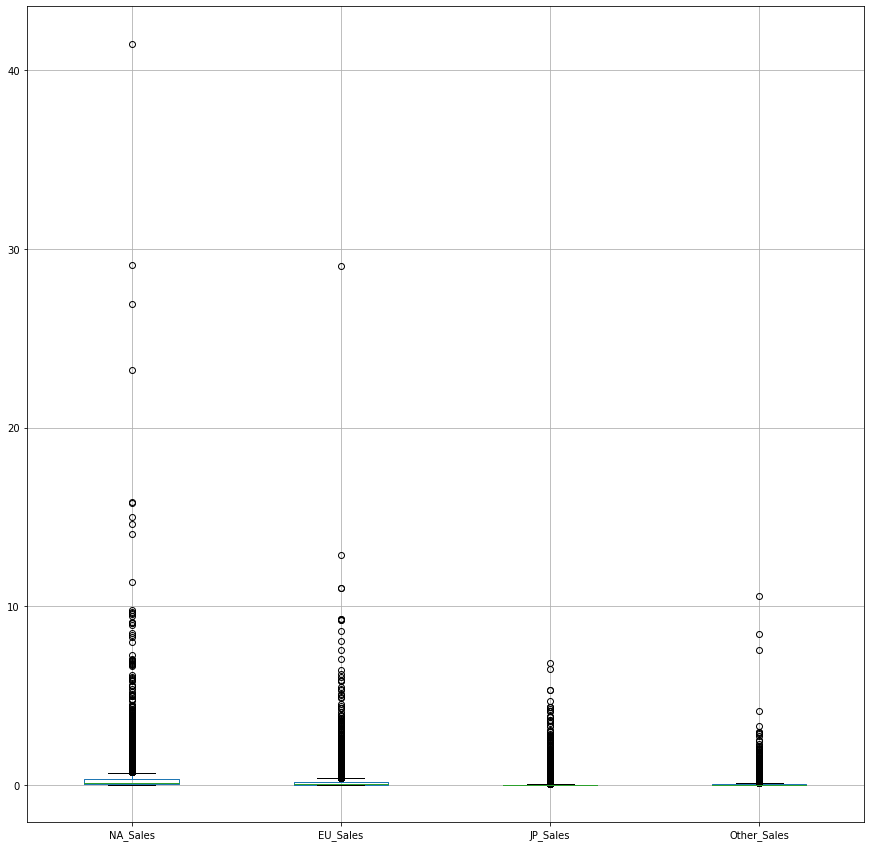

In [3]:
df.boxplot(column=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],figsize= (15,15));

In [77]:
# Suppression des outliers
df.drop(df.loc[df['NA_Sales']>6].index, inplace=True)
df.drop(df.loc[df['JP_Sales']>3].index, inplace=True)
df.drop(df.loc[df['EU_Sales']>4].index, inplace=True)
df.drop(df.loc[df['Other_Sales']>2].index, inplace=True)


In [4]:
#Suppression des lignes ou les ventes hors Japon sont à 0
indexNames = df[((df['NA_Sales']==0) & (df['EU_Sales']==0) & (df['Other_Sales']==0))].index
df.drop(indexNames , inplace=True)
df=df.fillna(0)

In [7]:
# Création d'un indicateur donnant un poids numérique à la série
tabserie=pd.DataFrame(df.groupby('serie')['serie'].count())
def categorize_serie(df):
    if(df['serie']==0):
        return 0
    else:
        return tabserie['serie'][df['serie']]
df['serie']=df['serie'].fillna(0)
df['SerieWeight']=df.apply(categorize_serie,axis=1)

In [8]:
#arrondi du nombre de vente au demi supérieur afin de limiter le nombre de target
#et multiplication par 10 pour que les tagets soient entiers
def arrondi_05(x):
    y=floor(x)
    z=x-y
    if z==0:
        return y*10
    elif z<0.5:
        return (y+0.5)*10
    else:
        return (y+1)*10
    df['NA_Sales']=df['NA_Sales'].apply(arrondi_05)
df['EU_Sales']=df['EU_Sales'].apply(arrondi_05)
df['JP_Sales']=df['JP_Sales'].apply(arrondi_05)
df['Other_Sales']=df['Other_Sales'].apply(arrondi_05)

In [10]:
df.drop(['Rank','serie','Name','gamename','samename','metaNoteQ','Global_Sales'], axis=1, inplace=True)

KeyError: "['Rank' 'serie' 'Name' 'gamename' 'samename' 'metaNoteQ' 'Global_Sales'] not found in axis"

In [11]:
df2 = pd.get_dummies(df)
target = df2['EU_Sales']
data = df2.drop(['EU_Sales'], axis=1, inplace=False)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=66)

In [13]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
clf = linear_model.LogisticRegression(C=1.0)
clf.fit(X_train_scaled, y_train)


C:\Users\Laurent\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_pred = clf.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 204  181    2    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [  80 1506   13    5    2    2    0    0    0    0    0    0    0    0
     0    1    0]
 [   2   70   18    4    1    1    2    0    1    0    0    0    0    0
     0    0    1]
 [   0   15   12    4    1    2    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    4    4    4    4    2    1    1    0    0    0    0    0    0
     0    0    0]
 [   0    2    3    2    0    0    0    1    0    0    0    0    0    0
     0    0    0]
 [   0    1    1    1    0    1    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    1    1    0    0    1    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    2    0    0    0    1    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    1    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    

In [16]:
clf.score(X_test_scaled, y_test)

0.7998159226875288

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.53      0.61       387
         5.0       0.85      0.94      0.89      1609
        10.0       0.34      0.18      0.24       100
        15.0       0.19      0.12      0.15        34
        20.0       0.44      0.20      0.28        20
        25.0       0.00      0.00      0.00         8
        30.0       0.00      0.00      0.00         4
        35.0       0.33      0.33      0.33         3
        40.0       0.00      0.00      0.00         3
        45.0       0.33      1.00      0.50         1
        50.0       0.00      0.00      0.00         0
        55.0       0.00      0.00      0.00         1
        60.0       0.00      0.00      0.00         1
        65.0       0.00      0.00      0.00         1
        80.0       0.00      0.00      0.00         1
        95.0       0.00      0.00      0.00         0
       295.0       0.00      0.00      0.00         0

    accuracy              

C:\Users\Laurent\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Laurent\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Laurent\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Laurent\anaconda3\lib\site-packages\sklearn\metr

In [18]:
cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

Classe prédite,0.0,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0,95.0,295.0
Classe réelle,,,,,,,,,,,,,
0.0,204,181,2,0,0,0,0,0,0,0,0,0,0
5.0,80,1506,13,5,2,2,0,0,0,0,0,1,0
10.0,2,70,18,4,1,1,2,0,1,0,0,0,1
15.0,0,15,12,4,1,2,0,0,0,0,0,0,0
20.0,0,4,4,4,4,2,1,1,0,0,0,0,0
25.0,0,2,3,2,0,0,0,1,0,0,0,0,0
30.0,0,1,1,1,0,1,0,0,0,0,0,0,0
35.0,0,0,0,1,1,0,0,1,0,0,0,0,0
40.0,0,0,0,0,0,2,0,0,0,1,0,0,0
